# **PYTHON PROJECT-ZOO ANIMAL CLASSIFICATION**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
file_path ='/content/drive/MyDrive/PYTHON_PROJECT/ZOO_DATASET/ZOO.csv'
df = pd.read_csv(file_path)
print(df)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

# **1) DATA CLEANING**

In [14]:
cleaned_df = df.dropna()
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df = cleaned_df.reset_index(drop=True)
print(cleaned_df)


    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

# **2) DATA PREPROCESSING**

In [15]:
import pandas as pd
print(df)

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

print("\nMissing values in each column:")
print(missing_values)


    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

# **3) DATA CLUSTERING**

<ipython-input-16-7998bf3feb52>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



Cluster Centers:
[[ 0.1008528   0.11513629 -0.17075297  0.19153849 -0.04255263 -0.00579837
   0.01311836  0.26120224  0.46569032  0.0916394  -0.15782449  0.10423764
  -0.21101735  0.36564263  0.05264123  0.17898215 -0.4033307 ]
 [-0.43525947 -0.49690399  0.73693388 -0.82663978  0.1836482   0.02502455
  -0.05661609 -1.12729389 -2.00982136 -0.39549635  0.68113726 -0.44986771
   0.91070645 -1.57803662 -0.22718845 -0.77244928  1.74069038]]


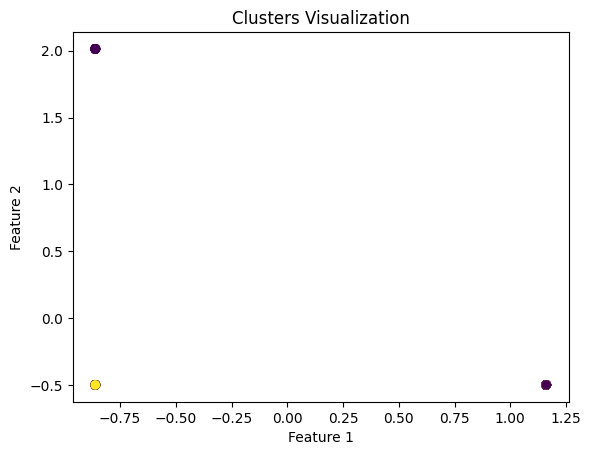


Clustered data saved to 'zoo_clustered.csv'.


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fill NaN values only in numerical columns
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].mean(), inplace=True)
# Alternatively, to fill all NaN values with 0:
# df = df.fillna(0)

# Select features for clustering (Assuming numerical columns for clustering)
# Exclude non-numeric columns if present
X = df.select_dtypes(include=['float64', 'int64'])

# Standardize the features (K-means works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the number of clusters
# Adjust the number of clusters to be less than or equal to the number of data points
n_clusters = min(2, len(X))  # Use 2 if X has more than 2 data points, otherwise use the length of X
# or, If you are sure that the dataset should have more than 3 samples, then investigate your data loading/cleaning step for potential loss of data before proceeding with clustering

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Print the cluster centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters (if data is 2D or reduced to 2D)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Save the clustered dataset to a CSV file
df.to_csv('/content/drive/MyDrive/PYTHON_PROJECT/ZOO_DATASET/zoo.csv', index=False)

print("\nClustered data saved to 'zoo_clustered.csv'.")

# **4) STATISTICAL SUMMARY OF THE DATASET**

In [17]:
import pandas as pd
# Generate the statistical summary of the dataset
summary = df.describe()

print("\nStatistical Summary of the Dataset:")
print(summary)

# If you want to save the summary as a CSV file
summary.to_csv('/content/drive/MyDrive/PYTHON_PROJECT/ZOO_DATASET/zoo.csv', index=False)

print("\nStatistical summary saved to 'zoo_statistical_summary.csv'.")



Statistical Summary of the Dataset:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.

# **5) LABEL ENCODING:**

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
print(df.columns)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Check if 'class_type' column exists in the DataFrame
if 'class_type' in df.columns:
    # If it exists, assign the values to the 'states' variable
    states = df['class_type']

    # Fit and transform 'class_type' to obtain encoded labels
    encoded_states = label_encoder.fit_transform(states)

    # Display the unique original class types and their encoded labels
    print("Original class types:", label_encoder.classes_)
    print("Encoded class types:", encoded_states)
else:
    print("Column 'class_type' not found in the DataFrame.")

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type', 'Cluster'],
      dtype='object')
Original class types: [1 2 3 4 5 6 7]
Encoded class types: [0 0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0 3 0 1 1 0 1 5 4 4 0 0 0 5 0 0 1 3 0 0
 1 3 5 5 1 5 1 0 0 6 0 0 0 0 5 4 6 0 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 1 6 3
 0 0 2 6 1 1 2 6 3 1 0 6 3 1 5 4 2 2 3 0 0 1 0 5 0 6 1]


# **6) MEASURES OF CENTRAL TENDENCY**

In [19]:
import pandas as pd
from scipy import stats
# Calculate mean, median, and mode for each numerical column
central_tendency = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # Mode can return multiple values, take the first one

    central_tendency[column] = {
        'mean': mean,
        'median': median,
        'mode': mode
    }

# Display the results
print("\nMeasures of Central Tendency (Mean, Median, Mode):")
for column, measures in central_tendency.items():
    print(f"\n{column}:")
    print(f"Mean: {measures['mean']}")
    print(f"Median: {measures['median']}")
    print(f"Mode: {measures['mode']}")

# Save the central tendency measures to a CSV file
df_central_tendency = pd.DataFrame(central_tendency).T
df_central_tendency.to_csv('/content/drive/MyDrive/PYTHON_PROJECT/ZOO_DATASET/zoo.csv', index=True)

print("\nMeasures of central tendency saved to 'zoo_central_tendency.csv'.")



Measures of Central Tendency (Mean, Median, Mode):

hair:
Mean: 0.42574257425742573
Median: 0.0
Mode: 0

feathers:
Mean: 0.19801980198019803
Median: 0.0
Mode: 0

eggs:
Mean: 0.5841584158415841
Median: 1.0
Mode: 1

milk:
Mean: 0.40594059405940597
Median: 0.0
Mode: 0

airborne:
Mean: 0.2376237623762376
Median: 0.0
Mode: 0

aquatic:
Mean: 0.3564356435643564
Median: 0.0
Mode: 0

predator:
Mean: 0.5544554455445545
Median: 1.0
Mode: 1

toothed:
Mean: 0.6039603960396039
Median: 1.0
Mode: 1

backbone:
Mean: 0.8217821782178217
Median: 1.0
Mode: 1

breathes:
Mean: 0.7920792079207921
Median: 1.0
Mode: 1

venomous:
Mean: 0.07920792079207921
Median: 0.0
Mode: 0

fins:
Mean: 0.16831683168316833
Median: 0.0
Mode: 0

legs:
Mean: 2.8415841584158414
Median: 4.0
Mode: 4

tail:
Mean: 0.7425742574257426
Median: 1.0
Mode: 1

domestic:
Mean: 0.12871287128712872
Median: 0.0
Mode: 0

catsize:
Mean: 0.43564356435643564
Median: 0.0
Mode: 0

class_type:
Mean: 2.8316831683168315
Median: 2.0
Mode: 1

Measures of c

#**7) CLASSIFICATION**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Separate features and target variable
X = df.drop(['animal_name', 'class_type'], axis=1)  # Features
y = df['class_type']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9354838709677419
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **8) COVARIANCE MATRIX**

In [21]:
import pandas as pd

# Calculate the covariance matrix for numerical columns only
# Select only numerical columns before calculating the covariance
numerical_df = df.select_dtypes(include=['number'])
cov_matrix = numerical_df.cov()

print("\nCovariance Matrix:")
print(cov_matrix)

# Save the covariance matrix to a CSV file
# Note: Changed filename to avoid overwriting the DataFrame
cov_matrix.to_csv('zoo_covariance_matrix.csv', index=True)

print("\nCovariance matrix saved to 'zoo_covariance_matrix.csv'.")


Covariance Matrix:
                hair  feathers      eggs      milk  airborne   aquatic  \
hair        0.246931 -0.085149 -0.201188  0.215446 -0.042178 -0.113267   
feathers   -0.085149  0.160396  0.083168 -0.081188  0.112475 -0.011287   
eggs       -0.201188  0.083168  0.245347 -0.229505  0.079802  0.089703   
milk        0.215446 -0.081188 -0.229505  0.243564 -0.077426 -0.086139   
airborne   -0.042178  0.112475  0.079802 -0.077426  0.182970 -0.035545   
aquatic    -0.113267 -0.011287  0.089703 -0.086139 -0.035545  0.231683   
predator   -0.038416 -0.020891  0.002871 -0.007327 -0.063069  0.090396   
toothed     0.120297 -0.120792 -0.156337  0.152376 -0.124950  0.012574   
backbone    0.036634  0.035644 -0.064851  0.073069 -0.017228  0.004158   
breathes    0.089406  0.041584 -0.077327  0.085248  0.049901 -0.125149   
venomous   -0.014059 -0.015842  0.013267 -0.032475  0.000990  0.011485   
fins       -0.052376 -0.033663  0.030693 -0.029010 -0.040396  0.109406   
legs        0.3981

# **9) LINEAR REGRESSION**


Mean Squared Error (MSE): 3.5796656084656084
R-squared (R2): 0.15761337602276781

Model Coefficients: [-2.54666667]
Intercept: 3.8799999999999994


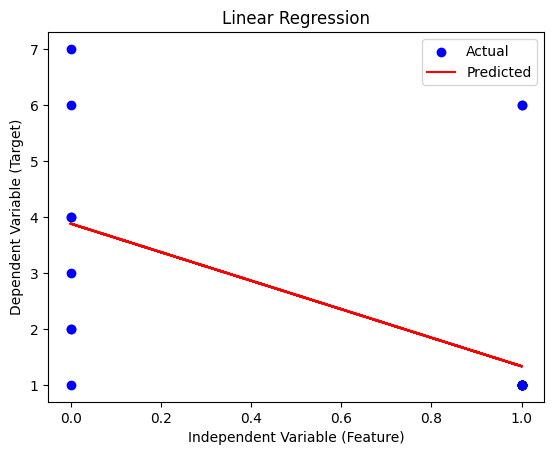

    Actual  Predicted
84       1   1.333333
55       1   1.333333
66       1   3.880000
67       1   1.333333
45       1   1.333333
39       6   1.333333
22       1   1.333333
44       1   1.333333
10       1   1.333333
0        1   1.333333
18       4   3.880000
30       6   3.880000
97       6   1.333333
33       2   3.880000
77       7   3.880000
4        1   1.333333
93       1   1.333333
78       2   3.880000
12       4   3.880000
31       1   1.333333
76       3   3.880000

Linear regression results saved to 'zoo_linear_regression_results.csv'.


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
X = df[['hair']]
y = df['class_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Independent Variable (Feature)')
plt.ylabel('Dependent Variable (Target)')
plt.legend()
plt.show()
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
results.to_csv('zoo_linear_regression_results.csv', index=False)
print("\nLinear regression results saved to 'zoo_linear_regression_results.csv'.")

# **10) IOR (Inter Quartile Range)**

In [23]:
import pandas as pd
# Function to calculate IQR for each numerical column
def calculate_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1
    return IQR

# Calculate IQR for all numerical columns
iqr_values = df.select_dtypes(include=['float64', 'int64']).apply(calculate_iqr)

print("\nInterquartile Range (IQR) for each numerical column:")
print(iqr_values)

# Save the IQR values to a CSV file
iqr_values.to_csv('/content/drive/MyDrive/PYTHON_PROJECT/ZOO_DATASET/zoo.csv', index=True)

print("\nIQR values saved to 'zoo_iqr_values.csv'.")



Interquartile Range (IQR) for each numerical column:
hair          1.0
feathers      0.0
eggs          1.0
milk          1.0
airborne      0.0
aquatic       1.0
predator      1.0
toothed       1.0
backbone      0.0
breathes      0.0
venomous      0.0
fins          0.0
legs          2.0
tail          1.0
domestic      0.0
catsize       1.0
class_type    3.0
dtype: float64

IQR values saved to 'zoo_iqr_values.csv'.


# **11) PARALLEL COORDINATES**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
if 'class_column' not in df.columns:
    print("Ensure you have a categorical column to group the data.")
else:
    # Plot the parallel coordinates chart
    plt.figure(figsize=(10, 6))
    parallel_coordinates(df, 'class_column', color=plt.cm.Set1.colors)
    plt.title('Parallel Coordinates Plot')
    plt.xlabel('animal_name')
    plt.ylabel('domestic')
    plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
    plt.grid(True)
    plt.show()


Ensure you have a categorical column to group the data.


# **12) MARKOVCHAIN**

In [25]:
import pandas as pd
import numpy as np

# Replace 'categorical_column' with the actual column name from your DataFrame
# For example, if the column containing the states is named 'class_type', change the line below to:
states_column = 'class_type'
# states_column = 'categorical_column'  # Modify this to the actual column name
states = df[states_column].unique()  # Unique states in the column

# Initialize the transition matrix
n_states = len(states)
transition_matrix = np.zeros((n_states, n_states))

# Map states to indices
state_to_idx = {state: idx for idx, state in enumerate(states)}

# Calculate transitions by observing the dataset
for i in range(len(df) - 1):
    current_state = df[states_column].iloc[i]
    next_state = df[states_column].iloc[i + 1]

    # Increment the transition count from current_state to next_state
    transition_matrix[state_to_idx[current_state], state_to_idx[next_state]] += 1

# Convert transition counts to probabilities
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Ensure no division by zero issues (rows where no transitions occurred)
transition_matrix = np.nan_to_num(transition_matrix)

print("\nTransition Matrix:")
print(pd.DataFrame(transition_matrix, index=states, columns=states))

# Function to simulate the Markov Chain
def markov_chain_simulation(transition_matrix, states, initial_state, steps):
    # Find the index of the initial state
    current_state_idx = state_to_idx[initial_state]

    # List to store the sequence of states
    state_sequence = [initial_state]

    for _ in range(steps):
        # Select the next state based on the transition matrix
        next_state_idx = np.random.choice(
            range(len(states)),
            p=transition_matrix[current_state_idx]
        )
        # Append the next state to the sequence
        state_sequence.append(states[next_state_idx])

        # Update the current state
        current_state_idx = next_state_idx

    return state_sequence

# Number of steps to simulate
steps = 10

# Choose an initial state (you can modify this to any valid state)
initial_state = states[0]  # Use the first state as the initial state

# Simulate the Markov Chain
state_sequence = markov_chain_simulation(transition_matrix, states, initial_state, steps)

print("\nState sequence generated by the Markov Chain:")
print(state_sequence)

# Save the result to a CSV file
df_sequence = pd.DataFrame({'Step': list(range(steps + 1)), 'State': state_sequence})
df_sequence.to_csv('/content/drive/MyDrive/PYTHON_PROJECT/ZOO_DATASET/zoo.csv', index=False)

print("\nMarkov Chain state sequence saved to 'zoo_markov_chain_sequence.csv'.")


Transition Matrix:
          1         4         2         7         6      5         3
1  0.560976  0.073171  0.195122  0.073171  0.073171  0.000  0.024390
4  0.461538  0.153846  0.153846  0.076923  0.076923  0.000  0.076923
2  0.263158  0.210526  0.263158  0.052632  0.157895  0.000  0.052632
7  0.200000  0.300000  0.300000  0.200000  0.000000  0.000  0.000000
6  0.250000  0.000000  0.250000  0.000000  0.125000  0.375  0.000000
5  0.250000  0.000000  0.000000  0.250000  0.000000  0.250  0.250000
3  0.200000  0.200000  0.000000  0.400000  0.000000  0.000  0.200000

State sequence generated by the Markov Chain:
[1, 1, 2, 3, 3, 7, 7, 4, 4, 2, 2]

Markov Chain state sequence saved to 'zoo_markov_chain_sequence.csv'.


# **13) HMM**

In [26]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.5 MB/s eta 0:00:00


In [27]:
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
import pandas as pd
print(df.columns)
features = df.drop(['animal_name', 'legs'], axis=1)  # Now this line should work
states = df['class_type']
label_encoder = LabelEncoder()
encoded_states = label_encoder.fit_transform(states)
X = features.values
lengths = [len(X)]
model = hmm.GaussianHMM(n_components=len(np.unique(encoded_states)), covariance_type="diag", n_iter=100)
model.fit(X, lengths)
hidden_states = model.predict(X)
predicted_classes = label_encoder.inverse_transform(hidden_states)
print("Predicted class types for each animal:", predicted_classes)

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type', 'Cluster'],
      dtype='object')
Predicted class types for each animal: [1 1 3 1 1 1 6 3 3 6 1 5 3 7 7 7 5 1 3 1 5 5 1 5 2 3 4 6 1 6 2 6 1 5 3 6 1
 5 3 2 2 5 2 5 1 1 7 1 1 1 1 2 3 7 1 1 5 5 5 5 3 3 4 6 1 6 1 1 6 1 6 5 2 3
 1 1 4 7 5 5 4 2 3 5 1 7 4 5 2 3 4 4 3 6 1 5 1 2 1 2 5]


# **14) T-TEST**

In [28]:
from scipy.stats import ttest_ind

# Separate animals with hair and without hair
animals_with_hair = df[df['hair'] == 1]['legs']
animals_without_hair = df[df['hair'] == 0]['legs']

# Perform t-test
t_stat, p_value = ttest_ind(animals_with_hair, animals_without_hair)

# Output the results
t_stat, p_value


(4.265375066448271, 4.569261992606275e-05)

# **15) F-TEST**

In [29]:
from scipy.stats import f_oneway

# Separate animals with hair and without hair
animals_with_hair = df[df['hair'] == 1]['legs']
animals_without_hair = df[df['hair'] == 0]['legs']

# Perform F-test (ANOVA)
f_stat, p_value = f_oneway(animals_with_hair, animals_without_hair)

# Output the results
f_stat, p_value


(18.193424457478596, 4.569261992606258e-05)

# **16) CHI-SQUARE TEST**

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table between 'hair' and 'predator'
contingency_table = pd.crosstab(df['hair'], df['predator'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
chi2_stat, p_value


(1.8305092937335319, 0.1760674020950368)

# **17) ONE-WAY ANOVA**

In [31]:
from scipy.stats import f_oneway

# Group the data by class_type and extract the legs column
grouped_data = [df[df['class_type'] == group]['legs'] for group in df['class_type'].unique()]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*grouped_data)


# Output the results
f_stat, p_value


(19.76654804887849, 8.305909188211792e-15)

# **18) TWO-WAY ANOVA**

In [32]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare the data for Two-Way ANOVA
# Let's assume 'legs' is the dependent variable and 'hair' & 'predator' are the independent variables
model = ols('legs ~ C(hair) + C(predator) + C(hair):C(predator)', data=df).fit()

# Perform Two-Way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Output the ANOVA table
print(anova_table)


                         sum_sq    df          F    PR(>F)
C(hair)               60.711547   1.0  16.912539  0.000082
C(predator)            0.635842   1.0   0.177128  0.674784
C(hair):C(predator)    0.437655   1.0   0.121918  0.727720
Residual             348.204370  97.0        NaN       NaN


# **19) BAR PLOT**

<ipython-input-33-551e1f1e5502>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


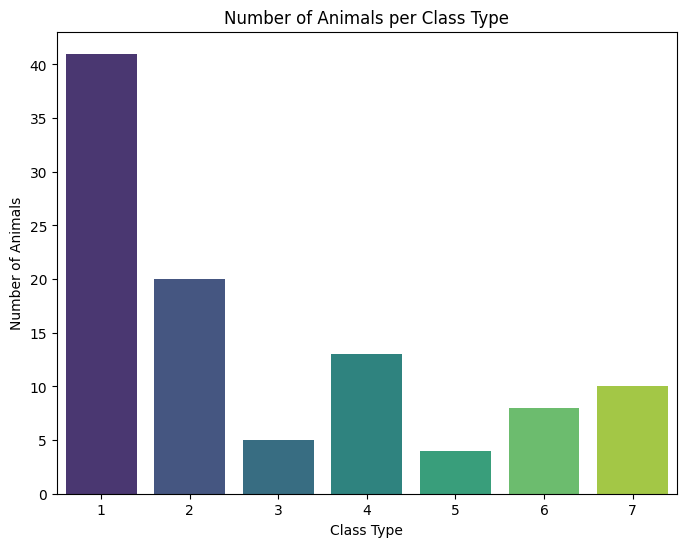

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of animals in each class_type
class_counts = df['class_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Class Type')
plt.ylabel('Number of Animals')
plt.title('Number of Animals per Class Type')

# Show the plot
plt.show()


# **20) LINE PLOT**

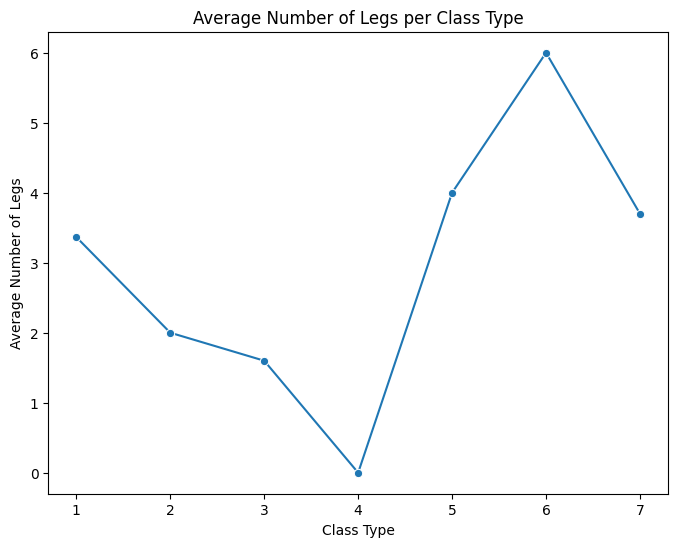

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean number of legs for each class_type
mean_legs_per_class = df.groupby('class_type')['legs'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='class_type', y='legs', data=mean_legs_per_class, marker='o')

# Add labels and title
plt.xlabel('Class Type')
plt.ylabel('Average Number of Legs')
plt.title('Average Number of Legs per Class Type')

# Show the plot
plt.show()


# **21) 3D SCATTER PLOT**

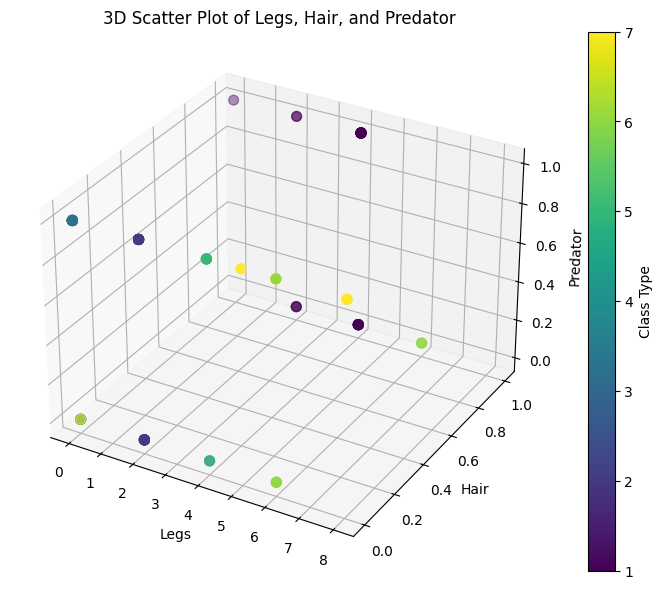

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'legs' (x), 'hair' (y), and 'predator' (z)
x = df['legs']
y = df['hair']
z = df['predator']

# Plotting the scatter plot
scatter = ax.scatter(x, y, z, c=df['class_type'], cmap='viridis', s=50)

# Add labels
ax.set_xlabel('Legs')
ax.set_ylabel('Hair')
ax.set_zlabel('Predator')

# Add a color bar
cbar = fig.colorbar(scatter)
cbar.set_label('Class Type')

# Show the plot
plt.title('3D Scatter Plot of Legs, Hair, and Predator')
plt.show()


# **22) HEATMAP**

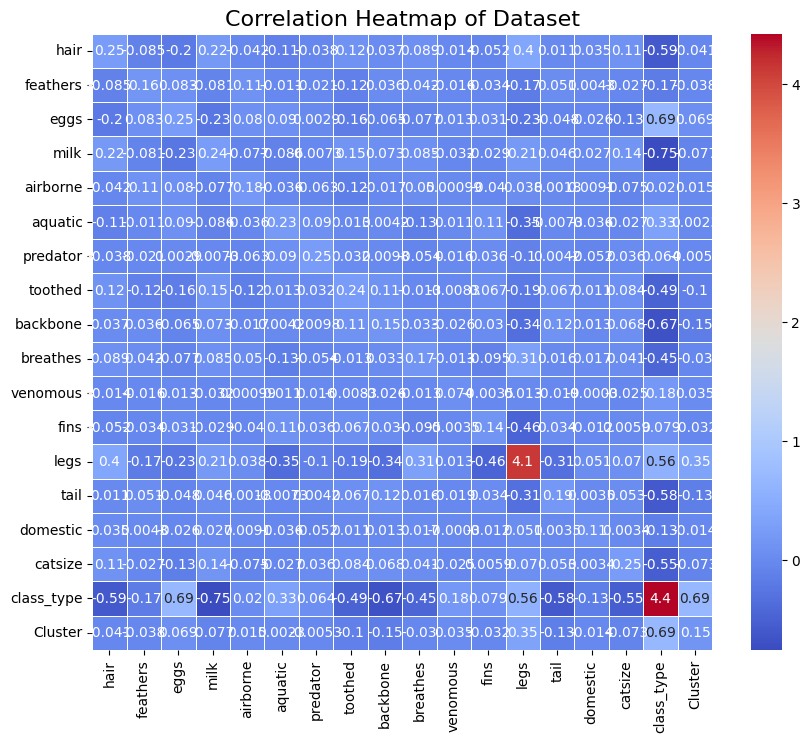

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numeric columns
correlation_matrix = cov_matrix

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Dataset', fontsize=16)

# Show the plot
plt.show()


# **23) VIOLIN PLOT**

<ipython-input-37-b1a08b9958fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class_type', y='legs', data=df, palette='Set2')


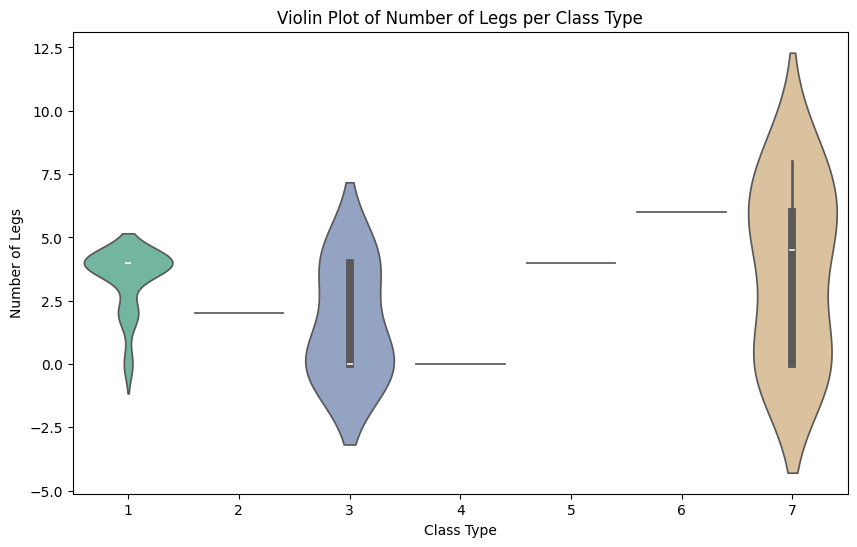

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='class_type', y='legs', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Class Type')
plt.ylabel('Number of Legs')
plt.title('Violin Plot of Number of Legs per Class Type')

# Show the plot
plt.show()


# **24)COUNT PLOT**

<ipython-input-38-3a8c10d0158c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_type', data=df, palette='viridis')


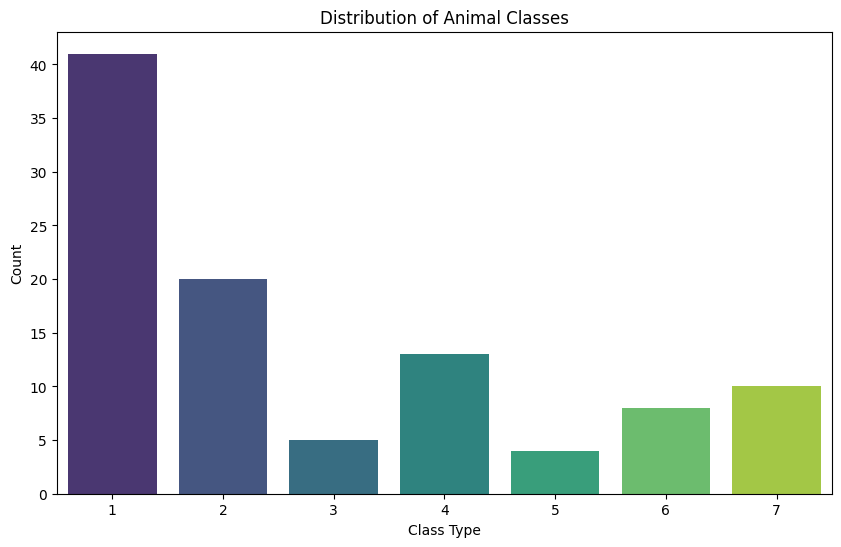

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a count plot for 'class_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='class_type', data=df, palette='viridis')
# Customize the plot
plt.title('Distribution of Animal Classes')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()


# **25) PAIR PLOT**

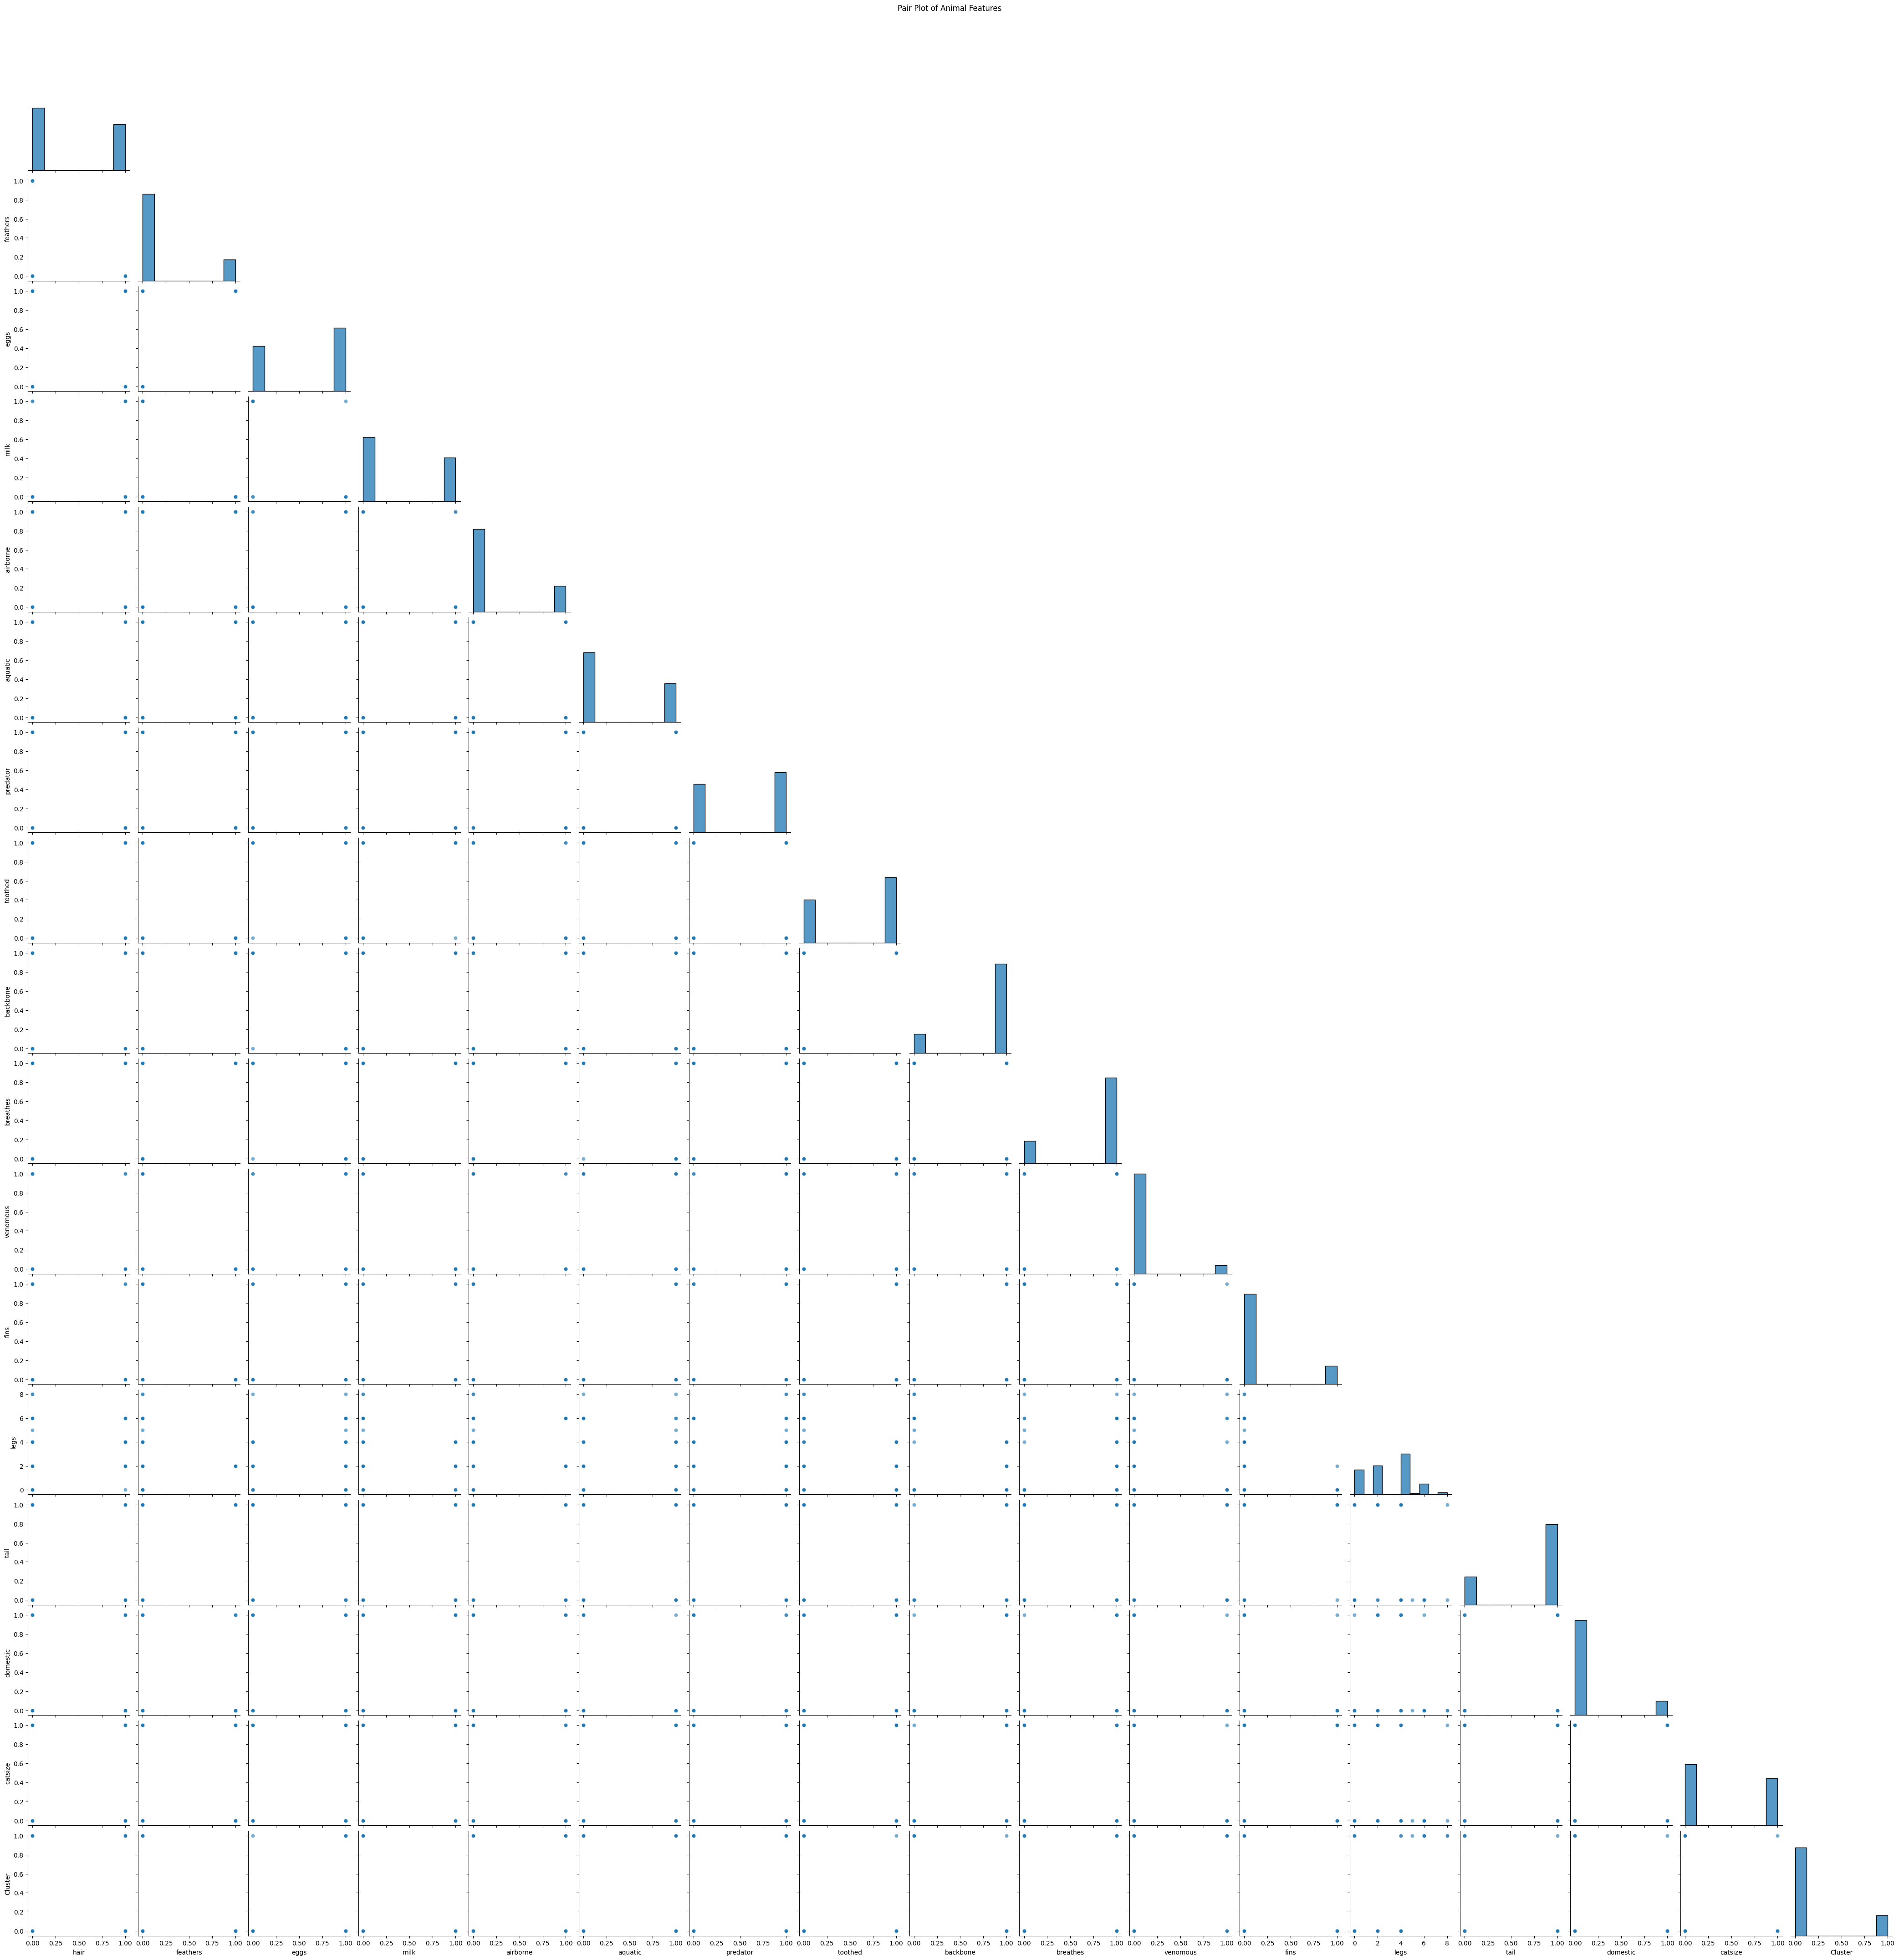

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_numeric = df.drop(['animal_name', 'class_type'], axis=1)

# Create a pair plot for the numeric features
sns.pairplot(data_numeric, diag_kind='hist', corner=True, plot_kws={'alpha':0.6})

# Display the plot
plt.suptitle("Pair Plot of Animal Features", y=1.02)
plt.show()


# **26) HISTOGRAM**

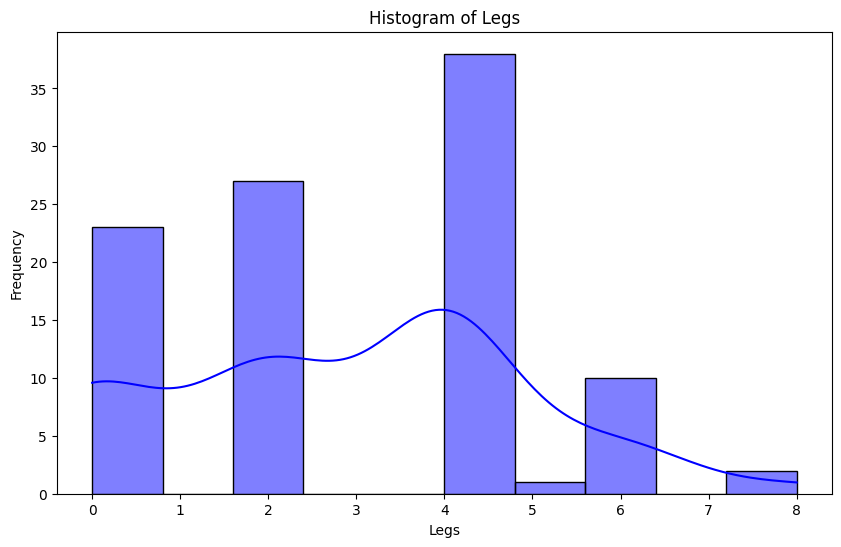

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Choose the feature for the histogram
feature = 'legs'

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], bins=10, kde=True, color='blue')

# Customize the plot
plt.title(f'Histogram of {feature.capitalize()}')
plt.xlabel(feature.capitalize())
plt.ylabel('Frequency')
plt.show()
